Jakub Kwaśniak

Jakub Domański

Mehmet Emre Durmus

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fmin

# Mimization

Create a python Function called Func_1(x) $= (x^4-61x^3+1160x^2-7100x+6.e3)*e^{(-\frac{x}{10.})}$

In [2]:
def Func_1(x):
    return (x**4 - 61*x**3 + 1160*x**2 - 7100*x + 6e3)*np.exp(-x/10)

From WolframAlpha we get that the derivative of this function is given by the approximate expression:
$$-0.1e^{-x/10}(-58.1509 + x)(-25.0967 + x)(-13.9776 + x)(-3.77471 + x)$$
which suggests that within the range [0,50) the function has 3 extrema.

We consider the actual minimum of the function calculated using scipy's functionality.

In [3]:
min_comp1 = fmin(Func_1, 0)[0]
print(min_comp1)

Optimization terminated successfully.
         Current function value: -5039.139505
         Iterations: 29
         Function evaluations: 58
3.774687500000005


In [4]:
min_comp2 = fmin(Func_1, 26)[0]
print(f"{min_comp2:.5f}")

Optimization terminated successfully.
         Current function value: -739.062727
         Iterations: 16
         Function evaluations: 32
25.09673


Define x as an array with lineary spaced values in the range [0,50)

In [5]:
X1 = np.linspace(0,50)

plot Func_1(x) in the range [0,50]

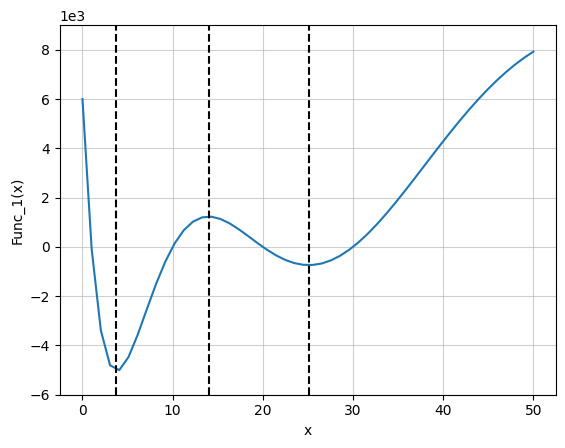

In [6]:
plt.plot(X1, Func_1(X1)) #plotting the function over the range [0,50)
plt.grid(alpha=0.6) #adding a grid 
plt.xlabel("x") #setting the labels
plt.ylabel("Func_1(x)")
plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3)) #changing the y-axis ticks to be in scientific notation
plt.vlines((3.77,13.98,25.10),-6e3,9e3,linestyle="dashed",color='k') #addin vertical lines to indicate the positions of the extrema
plt.ylim(-6e3,9e3)
plt.show()

Now we will try to find the minimum. Graphically determines the (approximated) miminimum:

How many minima ?
ANSWER :  **We expected from the results above that Func_1(x) had three extrema within [0,50) at about 3.77, 13.98, and 25.10 which is precisely what we observe in this plot. Two of the first and last of these extrema are local minima while the second is a local maximum** 

What are the approximate values ?
ANSWER: **Judging solely from the plot we can at most guess these minima to be at around 4 and 26. However, thanks to the SciPy library we already know these two minima to be at around 3.77471 and 25.09673**


Now we will try to find the minima using the 3 points bissection bracketing rule $[x_1, x_2,x_3]$, so that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$ so that we are sure a minimum exists between $x_1$ and $x_3$.


Write a python function, called " Minim_Func_1 ", that finds the minimum of function Func_1(x), starting from a triplet (x1,x2,x3) defined as above.

Your code must:

* take x1,x2,X3 as an arguement as well as:  $\epsilon$, the desired accuracy
* check first that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$
* iterate to find the minimum 
* Make sure than no more than Nitermax(=1000) iterations are done.

The function must return three number :

The value of the found minimum, the accuracy, the number of steps.







1st method : The new point to consider will be the center  of the largest segment.


In [7]:
def Minim_Func_1(x1:float, x2:float, x3:float, eps:float, Nitermax=1000) -> float:
    """Function calculating the minimum of Func_1 using bisection rule.
    Params:
    x1 (float): left-limit of the bracket
    x2 (float): control point of the bracket
    x3 (float): right-limit of the bracket
    eps (float): desired accuracy
    Itermax (int): maximum number of iterations (default=1000)
    
    x2 (float): approximation of the minimum
    delta: reached accuracy
    N: number of iterations"""
    
    if Func_1(x1) > Func_1(x2) and Func_1(x3) > Func_1(x2): #check that a minimum exists, i.e. F(x_2) < F(x_1) and F(x_2) < F(x_3)
        N = 0 # Initialise a counter, N
        delta = np.abs(x3 - x1) # Calculate the width of the interval
        while N < Nitermax and delta > eps: #check that the maximum number of iterations or the desired accuracy has not been reached yet
            L12 = x2 - x1 # Calculate the distance between the left and control point
            L23 = x3 - x2 # Calculate the distance between the right and control point 

            if L12 > L23: #check if the control point is closer to the right point
                x_new = (x1 + x2)/2 #calculate the midpoint 
                if Func_1(x_new) < Func_1(x2): #check if the midpoint is closer to the minimum
                    x3 = x2 #change the control point to the new right point
                    x2 = x_new #set the new control point as the midpoint
                else: #if the midpoint is farther from the minimum
                    x1 = x_new #change the left point to the midpoint
            else: #if the control point is closer to the minimum
                x_new = (x2 + x3)/2 #calculate the midpoint
                if Func_1(x_new) < Func_1(x2): #check if the midpoint is closer to the minimum
                    x1 = x2 #change the left point to the control point
                    x2 = x_new #change control point to the midpoint 
                else: #if the control point is closer to the minimum
                    x3 = x_new #change the right point to the midpoint 
            
            delta = np.abs(x3 - x1) # Calculate the new width of the interval
            N+= 1 #update the counter
    else: #if the interval is monotone, that is there is no minimum 
        raise ValueError('No minimum in the interval!') #warn that there is no minimum in the interval
    
    return x2, delta, N #return the final control point along with the final interval width and number of iterations

In [8]:
results = Minim_Func_1(0.e0, 5.e0, 10.e0, 1.e-6) #testing the function for the interval [0,5,10] with accuracy 1e-6
print(f'minimum:\t{results[0]:}\naccuracy:\t{results[1]:.3e}\nno. iterations:\t{results[2]}\nError from Scipy value: {abs(results[0]-min_comp1):.3e}')

minimum:	3.7747079133987427
accuracy:	8.941e-07
no. iterations:	42
Error from Scipy value: 2.041e-05


Plot the number of iterations needed to get an accuracy , abs(x3-x1) , of 0.01, 0.001, 1.e-3,1.e-4, 1.e-5,1.e-6)



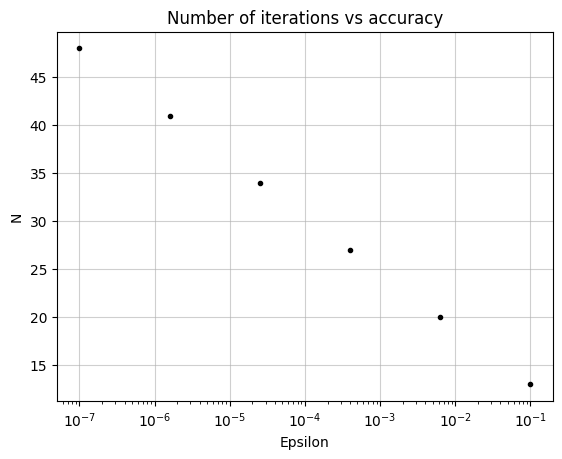

In [9]:
accuracy = np.logspace(-1, -7, abs(-7+1))
iters = []

for a in accuracy:
    iters.append(Minim_Func_1(0.e0,5.e0,10.e0, a, 1000)[2])

plt.errorbar(accuracy, iters, fmt="k.")
plt.title("Number of iterations vs accuracy")
plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("N")
plt.grid(alpha=0.6)
plt.show()

So we see that $\log(N)=a\log(\epsilon)+b\implies N=e^b*\epsilon^a$ that is the number of iterations is an exponential decay of $\epsilon$. In other words, the number of iterations increased exponentially as the desired accuracy increases, i.e. $\epsilon$ is decreased.

Plot the number and accuracy of the solution  as a function of the number of iterations. You can use the python matplotlib funcion : plt.semilogy

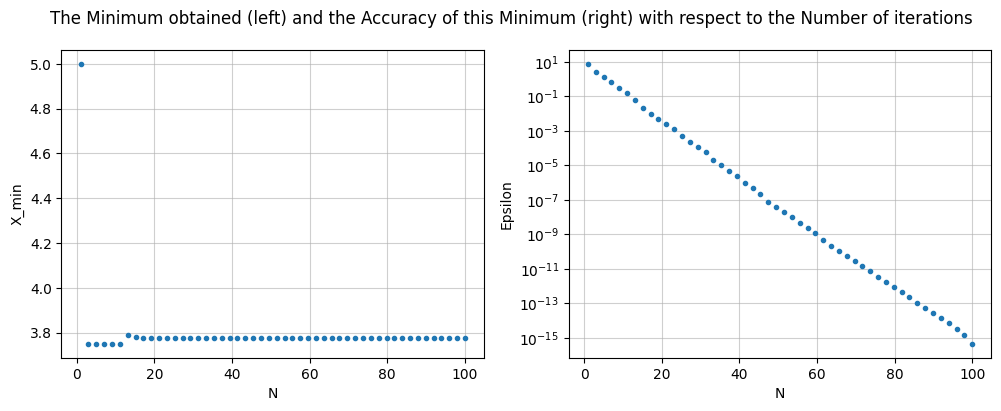

In [10]:
iters = np.linspace(1, 100,50)
result = []
accuracy = []

for i in iters:
    result.append(Minim_Func_1(0.e0,5.e0,10.e0, 1e-20, i)[0])
    accuracy.append(Minim_Func_1(0.e0,5.e0,10.e0,1e-20, i)[1])

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].errorbar(iters, result, fmt=".")
#axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("X_min")
axes[0].grid(alpha=0.6)

axes[1].errorbar(iters, accuracy, fmt=".")
axes[1].set_xlabel("N")
axes[1].set_ylabel("Epsilon")
axes[1].set_yscale("log")
axes[1].grid(alpha=0.6)

plt.suptitle("The Minimum obtained (left) and the Accuracy of this Minimum (right) with respect to the Number of iterations")
plt.show()

Once again it is apparent that $\log(N)\propto\log(\epsilon)$. We also see that the solution converges rather rapidly with as little as 20 iterations being enough to get an accurate result upto 3 decimals.



## A superlinear method.

We use [x1,x2,x3] as usual to bracket the minimum, but now point x4 will be the chose as the minimum of the parabola that passes through the 3 points [x1,x2,x3] with values [f(x1),f(x2),fx(3)] 
Note: The minimum of the parabola that passes trhough the 3 points f(a),f(b),f(c) is located at abscissa X such that

$
X=b-0.5\frac{(b-a)^2(f(b)-f(c))-(b-c)^2(f(b)-f(a))}{(b-a)(f(b)-f(c))-(b-c)(f(b)-f(a))}
$

Build a minimisation function called : Minim_Parab_Func_1 that search for the minimum using parabolic descent.

Note 1: for the method to be more efficient than bissection you must make sure at each time step that the new interval has a width smaller than 0.5 of the previoux step.
So a good way to do that is to compute X4 using the formula above (X=) that is the best guess for the next minimum and take the smallest segment that brackets the minimum wihin points [x1,x2,x3,x4,0.5*(x1+x3)].



For this we can use the two following methods :
* np.sort(S), that sort in ascending order a list of values contained in a list S
* V.argmin() that returns the index of the smallest element in a array (numpy array) V.
* to transform a list in a numpy array you can use : np.array(L) where L is a list.
Example : L=[1,2,3] is a list and np.array(L) returns an array with the same elements as in L

Note 2: Make sure that your interval is ALWAYS equilibrated, I mean that x2-x1 is always comparable to x3-x2 (not necessarily equal), to avoid the *bad* situation where one of the interval is much smaller than the other one.

Note 3 : To check that your minimization process is performing well,  I suggest that at each step you print x1,x2,x3 to check that everything is occuring properly.


In [12]:
def Minim_Parab_Func_1(x1:float, x2:float, x3:float, eps:float, Nitermax=1000) -> float:
    """Function calculating the minimum of Func_1 using the superlinear rule.
    Params:
    x1 (float): left-limit of the bracket
    x2 (float): control point of the bracket
    x3 (float): right-limit of the bracket
    eps (float): desired accuracy
    Nitermax (int): maximum number of iterations (default=1000)
    
    x4 (float): guess for the minimum
    x5 (float: midpoint of the interval
    delta: reached accuracy
    N: number of iterations"""
    
    N = 0 #initialise a counter, N
    delta = np.abs(x3 - x1) # Calculate the width of the interval
    
    while N < Nitermax and delta > eps: #check that the maximum number of iterations or the desired accuracy has not been reached yet
        d_21 = x2 - x1 # Calculate the distance between the left and control point
        d_23 = x2 - x3 # Calculate the distance between the right and control point
        d_f2f1 = Func_1(x2) - Func_1(x1) # Calculate the distance between the values of the function at the left and control points
        d_f2f3 = Func_1(x2) - Func_1(x3) # Calculate the distance between the values of the function at the right and control points

        x4 = x2 - 0.5 * ((d_21**2)*d_f2f3 - (d_23**2)*d_f2f1) / (d_21*d_f2f3 - d_23*d_f2f1) # Compute the best guess for the minimum
        x5 = (x1 + x3)/2 # Calculate the midpoint 

        S = np.sort(np.unique([x1, x2, x3, x4, x5])) # sort all points and remove duplicates
        FS = Func_1(S) # apply function to all the points

        x1 = S[FS.argmin()-1] #update the left point to the closest point to the left
        x2 = S[FS.argmin()] #update the current minimum estimate
        x3 = S[FS.argmin()+1] #update the right point to the closest point to the right

        delta = np.abs(x3 - x1) # Calculate the new width of the interval
        N+= 1 #update the counter
    
    return x2, delta, N #return the final control point along with the final interval width and number of iterations

Test the convergence speed of the parabolic descent rule, and display  a same graph as before. Show that the parabolic method converges much more rapidly than other method

In [13]:
def print_results(min):
    print(f'minimum:\t{results[0]:}\naccuracy:\t{results[1]:.3e}\nno. iterations:\t{results[2]}\nError from reference value: {abs(results[0]-min):.3e}')

results = Minim_Parab_Func_1(0, 5.e0, 10, 1.e-6) ##testing the function for the interval [0,5,10] with accuracy 1e-6
print_results(min_comp1)

minimum:	3.7747076717535806
accuracy:	3.545e-07
no. iterations:	10
Error from reference value: 2.017e-05


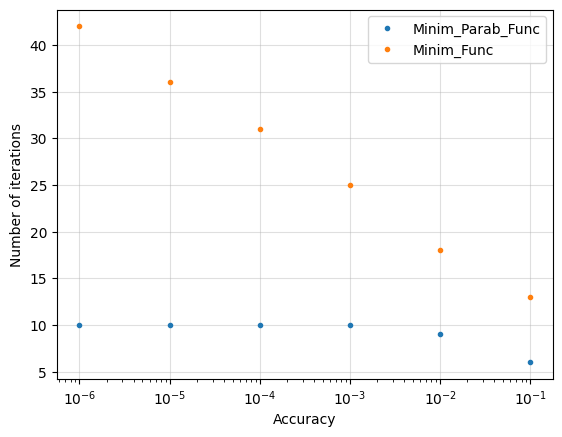

In [14]:
delta = [1.e-1, 1.e-2, 1.e-3, 1.e-4, 1.e-5, 1.e-6]
nplist_parab = [Minim_Parab_Func_1(0,5,10, d)[2] for d in delta]
nplist = [Minim_Func_1(0,5,10, d, 1000)[2] for d in delta]

plt.errorbar(delta, nplist_parab, fmt=".", label="Minim_Parab_Func")
plt.errorbar(delta, nplist, fmt=".", label="Minim_Func")
plt.xscale("log")
plt.xlabel("Accuracy")
plt.ylabel("Number of iterations")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

As we can see from the graph above, the number of iterations needed to reach the same accuracy for the parablic descenct method is much smaller than the bisection method, as expected.

Plot the accuracy of the result, as a function of the number of iterations for the bissection and for the superlinear method.

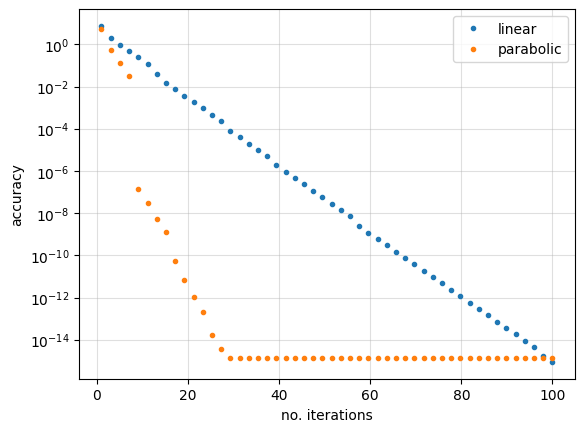

In [16]:
Iters = np.linspace(1, 100, 50)
Acc_lin = []
Acc_par = []

for iterations in Iters:
    Acc_lin.append(Minim_Func_1(0.e0, 5.1e0, 10.e0, 1e-20, iterations)[1])
    Acc_par.append(Minim_Parab_Func_1(0.e0, 5.1e0, 10.e0, 1e-20, iterations)[1])

plt.errorbar(Iters, Acc_lin, label="linear",fmt=".")
plt.errorbar(Iters, Acc_par, label="parabolic",fmt=".")
plt.yscale("log")
plt.xlabel("no. iterations")
plt.ylabel("accuracy")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

Once again we see that less no of iterations are needed to reach the same accuracy for the parabolic method compared to the linear one, that is the parabolic method is simply faster.

# finding the minimum of an arbitrary function : passing a function name as an argument


Now we wish our previous minimization function to be able to minimize any function, and not only the function called "Func_1". So we need to pass the function name as an argument. This is very simple in Python: we can just use an argument called (for example) $func$ and when we call the minimization function,  just pass the name of this funcion (without ' or ") in the variable func.
* Define a python function called Func_2(x) that compute any function of x (for example $f(x)=x^6-x^3$, or anything else you wish)
* Define a python function called 'call_func(f)', that will return f(2) by calling : call_func(Func_2) 

Shows that it works by typing : call_func(Func_2) 

In [17]:
 def Func_2(x):
    return x**6 - x**3
    
def call_func(f):
    return f(2)

print(call_func(Func_2))

56


Finding a minimum :
    plot Func_2 within a range of values of your choice bracketing is a minimum (between 0 and 1 should be enough)

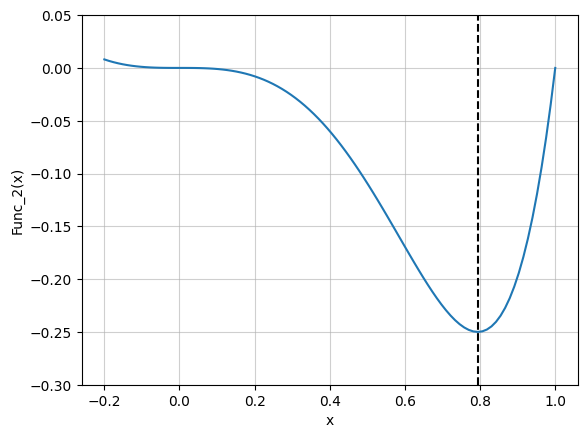

In [18]:
X2 = np.linspace(-0.2, 1, 100)
plt.plot(X2, Func_2(X2))
plt.grid(alpha=0.6)
plt.xlabel('x')
plt.ylabel('Func_2(x)')
plt.vlines(np.cbrt(1/2),-0.3,0.05,linestyle="dashed",color='k')
plt.ylim(-0.3,0.05)
plt.show()

Now we have $f(x)=x^6-x^3\implies f'(x)=6x^5-3x^2$ so $f'(x)=0\implies 6x^5=3x^2\implies x=0 \text{ or } x=\sqrt[3]{1/2}\approx0.7937$ which seems to be the minima of the plot above with the dashed line indicating the position of the minimum.

Build a minimization function of your choice that will accept [x1,x2,x3,Func_2] as an argument and that will find the minimum of Func_2 within [x1,x3]. Try to reuse what you have already coded above

In [19]:
def Minim_Parab_F(params, eps=1e-6, Nitermax=1000):
    """Function calculating the minimum of an arbitrary function using the superlinear rule.
    Params:
    params (list of three floats and a function): a list of the the three points giving the interval along with the function to minimise
    eps (float): desired accuracy
    Nitermax (int): maximum number of iterations (default=1000)
    
    x4 (float): guess for the minimum
    x5 (float: midpoint of the interval
    delta: reached accuracy
    N: number of iterations"""
    
    x1, x2, x3, F = params #initialize the parameters

    N = 0 #initialise a counter, N
    delta = np.abs(x3 - x1) # Calculate the width of the interval
    
    while N < Nitermax and delta > eps: #check that the maximum number of iterations or the desired accuracy has not been reached yet
        d_21 = x2 - x1 # Calculate the distance between the left and control point
        d_23 = x2 - x3 # Calculate the distance between the right and control point
        d_f2f1 = F(x2) - F(x1) # Calculate the distance between the values of the function at the left and control points
        d_f2f3 = F(x2) - F(x3) # Calculate the distance between the values of the function at the right and control points

        x4 = x2 - 0.5 * ((d_21**2)*d_f2f3 - (d_23**2)*d_f2f1) / (d_21*d_f2f3 - d_23*d_f2f1) # Compute the best guess for the minimum
        x5 = (x1 + x3)/2 # Calculate the midpoint 

        S = np.sort(np.unique([x1, x2, x3, x4, x5])) # sort all points and remove duplicates
        FS = np.array([F(s) for s in S]) # apply function to all the points

        x1 = S[FS.argmin()-1] #update the left point to the closest point to the left
        x2 = S[FS.argmin()] #update the current minimum estimate
        x3 = S[FS.argmin()+1] #update the right point to the closest point to the right

        delta = np.abs(x3 - x1) # Calculate the new width of the interval
        N+= 1 #update the counter
    
    return x2, delta, N #return the final control point along with the final interval width and number of iterations

params = [0, 0.8, 1, Func_2] # breaks for x2=0.5, the inflection point?

results = Minim_Parab_F(params)
print_results(np.cbrt(1/2))

minimum:	0.7937005257531958
accuracy:	3.941e-09
no. iterations:	10
Error from reference value: 2.309e-10


# Fitting a model to data: Determining the elimination time of a medicine in the body


We try to determine how long it takes for a medecine to be eliminated from a human body (metabolisation or eliminationin urines). The medicine is injected in a subject, and measurements of the medicine concentration are done regularly during several days. The data are the following. t is the date of all measurements (in minutes, t=0 is the moment of the injection).


In [20]:
T=[0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
       5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
       1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
       1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
       2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
       2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
       3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
       4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
       4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
       5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03]

The corresponding measured concentration are the following (in arbirary units)

In [21]:
C=[100.,  84.19752483,  79.43669653,  77.49545165,
        64.54338469,  45.67223012,  34.75582205,  36.55283011,
        41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
        14.20655088,  13.00527066,  15.21292955,   9.48415543,
         7.86202904,   9.48789641,  12.26344071,   6.86855964,
        14.8847701 ,   0.        ,   9.94703693,   4.97773134,
         8.15232925,   4.48353225,   8.75568603,   1.12007805,
         8.0847839 ,   0.        ,   1.19374786,   0.        ,
        11.38141968,   0.        ,   5.42182953,   0.        ,
         1.69707766,  15.76470042,   3.25146039,   1.46703363]

Plot C(t) with xlabel "minutes" and ylabel "concentration"

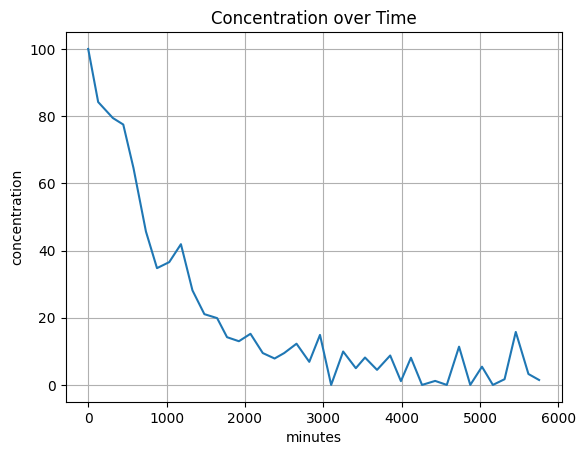

In [22]:
plt.plot(T, C)
plt.xlabel("minutes")
plt.ylabel("concentration")
plt.grid()
plt.title("Concentration over Time")
plt.show()

We assume now that C(t) can be given the form $C(t,\lambda)=100e^{-t/\lambda}$. We try to determine the value of $\lambda$ that best fits the function. In order to do this we will compare different functions (will different values of $\lambda$ with the observation). We define a function called $\chi(\lambda)$ that is a measure of the distance of a model to data. $\chi(\lambda)=\sum_{i=1}^{N} (C_{obs}(t_i)-C_{model}(t_i,\lambda))^2$. The best value of $\lambda$ is the one that minimizes  $\chi(\lambda)$.

* Write a function called $XHI(\lambda)$ that returns $\chi(\lambda)$


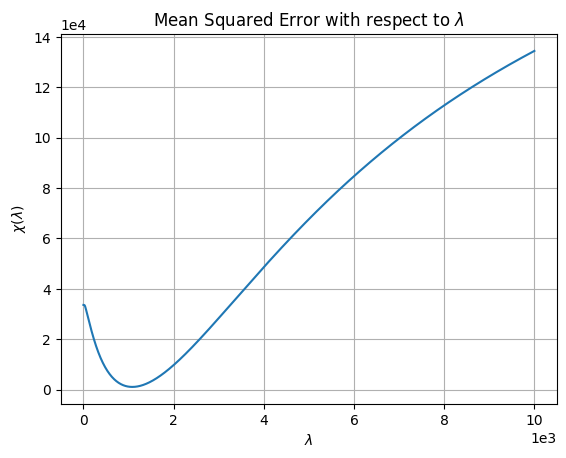

In [23]:
# Convert the lists to np arrays
T = np.array(T)
C = np.array(C)

def xhi(lamb: float) -> float:
    C_mod = np.array([100 * np.exp(-t/lamb) for t in T])
    return np.sum((C - C_mod)**2)

Lamb = np.linspace(1, 1e4, 1000)
Xhi = [xhi(l) for l in Lamb]
plt.plot(Lamb, Xhi)
plt.grid()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\chi(\lambda)$")
plt.title(r"Mean Squared Error with respect to $\lambda$")
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4)) #changing the y-axis ticks to be in scientific notation
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3)) #changing the y-axis ticks to be in scientific notation
plt.show()

We can already see that the minimum is around $\lambda=1.1*10^3$.

Using the functions you have defined above, find $\lambda$

In [24]:
params = [1, 1e3, 1e4, xhi]
results = Minim_Parab_F(params)

print_results(1.1e3) # here the error from the visual guess so it should be ignored
print(f"\nThe value of the Mean Squared Error of the model is about {xhi(results[0]):.3e} for this value of lambda.")

minimum:	1084.418928001845
accuracy:	9.517e-07
no. iterations:	13
Error from reference value: 1.558e+01

The value of the Mean Squared Error of the model is about 1.090e+03 for this value of lambda.


# 2 dimensional minimization

We want to minimize a function f(x,y) and we know that the minimum $(xm,ym)$ is such that $x1<xm<x2$ and $y1<ym<y2$. For example let's minimze the two variable function : $f(x,y)= ((x+y)/(y^2+1)+3xy-1)^2$. First define a function Func_3(x,y) that returns ((x+y)/(y^2+1)+3xy-1)^2.  There is a minimum betwenn -5 and +5 for x and y.


In [25]:
def Func_3(x,y):
    return ((x+y) / (y**2 + 1) + 3*x*y-1)**2  

If you want to visualise it  (not mandatory) you can use this little procedure that uses triangulation (note : I use a random sampling of X and Y, so the function is not super smooth, but this is an artifact.

To use this function, copy and paste the code above in a 'code cell" and type 'plot2Dfunc(Func,-5,5,-5,5) 'for example

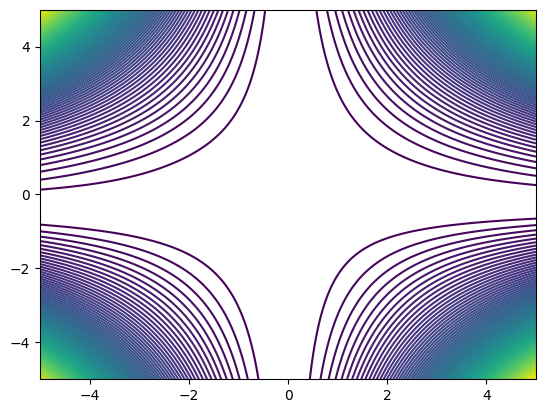

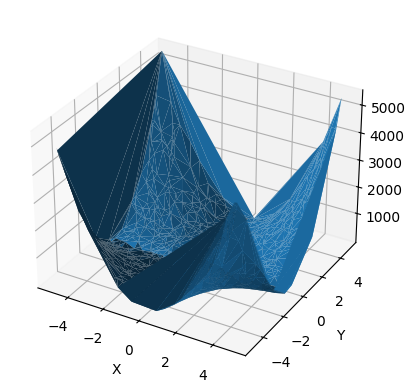

In [26]:
def plot2Dfunc(func,x1,x2,y1,y2):
    # input: 
    # func : function name
    # x1,x2 : x range
    # y1,y2 : y range
    #
    
    Npoints=1000 # number of points to sample
    

   
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.linspace(x1,x2,Npoints)
    y=np.linspace(y1,y2,Npoints)
    
    z=np.zeros([Npoints,Npoints])

    for i in range(Npoints):
        # Z[y,x]
        z[i,:]=func(x,y[i])
        
    
    plt.contour(x,y,z,100)
    plt.show()

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.random.uniform(x1,x2,Npoints)
    y=np.random.uniform(y1,y2,Npoints)
    
    z=func(x,y)
    
    
    fig = plt.figure()
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


plot2Dfunc(Func_3,-5,5,-5,5)

Now code a function that find the minimum of Func_3(x,y) using the following strategy.
Knowing that x1<xm<x2 and y1<ym<y2 : 
* start from a point (x0,y0) inside the interval and minimize along the x direction only (i.e. keeping y0=cst) between x1 and x2. Find a new point (x1,y0) closer to the minimum.
* now keep x1 constant and minimize along the y direction only (between y1 and y2). Find a new point (x1,y1) closer to the minimum.
* Redo the two previous steps up to a desired accuracy.
* Note : Re-use any of the functions that you have coded previously.
Find the minimum. How many steps did you do ?


In [27]:
def Minim_2D_F(params, F, eps=1e-6, Nitermax=1000):
    x1, xm, x2, y1, ym, y2 = params # Initialise the parameters
    steps = 0 # Initialise a counter
    delta = np.sqrt((x2-x1)**2 + (y2-y1)**2) # Combined width of the interval in x and y

    while steps < Nitermax and delta > eps: # Check that the maximum number of iterations or the desired accuracy has not been reached yet
        Func_3x = lambda x: Func_3(x, ym) # Partial function of x, y, fixed at ym
        xm, delta_x, last_steps = Minim_Parab_F([x1, xm, x2, Func_3x]) # Optimise x only
        steps += last_steps # Update steps

        Func_3y = lambda y: Func_3(xm, y) # Partial function of y, x, fixed at xm
        ym, delta_y, last_steps = Minim_Parab_F([y1, ym, y2, Func_3y]) # Optimise y only
        steps += last_steps # Update steps

        delta = np.sqrt(delta_x**2 + delta_y**2) # Update the width of the interval

    return xm, ym, delta, steps # Return the final x and y control points along with the final interval width and number of iterations

params = [-5, 0, 5, -5, 0, 5] #initialize the interval from -5 to 5 for both x and y
results = Minim_2D_F(params, Func_3) 
print(f'minimum x:\t{results[0]:}\nminimum y:\t{results[1]:}\naccuracy:\t{results[2]:.3e}\nno. iterations:\t{results[3]}') 

minimum x:	1.0
minimum y:	0.0
accuracy:	5.960e-07
no. iterations:	33
